In [1]:
import pandas as pd
import os
import datetime
import shutil
from PIL import Image

In [ ]:
df = pd.read_csv("../../labels/Anno_coarse/list_category_img.txt", delim_whitespace=True, header = 1)
df.head()

In [ ]:
for i in range(50):
    if not df[df.eq(i)['category_label']].empty :
        print(df[df.eq(i).any(axis=1)].head(1))
    else :
        print("No category " + str(i))

In [ ]:
category_df = pd.read_csv("../../labels/Anno_coarse/list_category_cloth.txt", delim_whitespace=True, header = 1)
category_df

In [ ]:
i = 0
for row in category_df.itertuples():
    if not df[df['image_name'].str.contains(str(row.category_name), regex=True)].empty:
        #print("Found " + row.category_name)
        category_df.at[row.Index, 'category_type'] = i
        #print(category_df.at[row.Index, 'category_type'])  # Affiche la valeur mise à jour
        i += 1
    else:
        print("Dropped " + row.category_name)
        category_df.drop(row.Index, inplace=True)
        
for row in category_df.itertuples():
    print(row)

In [6]:
category_df

,category_name,category_type
0,Anorak,0
1,Blazer,1
2,Blouse,2
3,Bomber,3
4,Button-Down,4
5,Cardigan,5
6,Flannel,6
7,Halter,7
8,Henley,8
9,Hoodie,9


In [157]:
def csv_to_txt(csv_path, txt_path):
    with open(csv_path, 'r') as csv_file, open(txt_path, 'w') as txt_file:
        for line in csv_file:
            txt_file.write(line)

In [ ]:
csv_filename = 'labels/Anno_coarse/categories.csv'
category_df.to_csv(csv_filename, index=False)
txt_filename = '../../labels/Anno_coarse/categories.txt'
csv_to_txt(csv_filename, txt_filename)
os.remove(csv_filename)

In [ ]:
df = pd.read_csv("../../labels/Anno_coarse/list_bbox.txt", delim_whitespace=True, header = 1)
df.head()

In [ ]:
blouse_df = df[df['image_name'].str.contains('Blouse')]
blouse_df

In [2]:
def corr_positions(df, cat_num):
    '''Corriger les positions des boîtes englobantes pour les coordonnées des centres et les dimensions des boîtes englobantes
    df : DataFrame des positions des boîtes englobantes
    cat_num : int
    return : DataFrame'''
    
    corr_data = []   
    
    for row in df.itertuples():
        img_path = 'data/' + row.image_name
        with open(img_path, 'rb') as img_file:
            image = Image.open(img_file)
            img_width, img_height = image.size
        image = row.image_name.replace('img/', '')
        img_name = image.replace('/', '_')
        width = (row.x_2 - row.x_1) 
        height = (row.y_2 - row.y_1)
        x_center = ((width/2) + row.x_1) / img_width
        y_center = ((height/2) + row.y_1) / img_height
        width = width / img_width
        height = height / img_height
        corr_data.append({'image_name': img_name, 'category_type': cat_num, 'x_center': x_center, 'y_center': y_center, 'width': width, 'height': height}) 
    corr_df = pd.DataFrame(corr_data)
    return corr_df

In [3]:
def find_category(df, category_name):
    '''Trouver la catégorie de vêtement dans le DataFrame
    df : DataFrame des catégories
    category_name : str
    return : int'''
    
    return df[df['category_name'].str.contains(category_name)].category_type.values[0]

In [33]:
blouse_cat = find_category(category_df, 'Blouse')
blouse_corr_df = corr_positions(blouse_df, blouse_cat)
blouse_corr_df.head()

,image_name,category_type,x_center,y_center,width,height
0,Sheer_Pleated-Front_Blouse_img_00000001.jpg,2,152.0,176.0,160,194
1,Sheer_Pleated-Front_Blouse_img_00000002.jpg,2,111.0,110.0,88,102
2,Sheer_Pleated-Front_Blouse_img_00000003.jpg,2,110.5,132.5,91,135
3,Sheer_Pleated-Front_Blouse_img_00000004.jpg,2,109.0,122.0,116,120
4,Sheer_Pleated-Front_Blouse_img_00000005.jpg,2,106.0,175.0,120,174


In [63]:
blouse_df.head()

,image_name,x_1,y_1,x_2,y_2
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,72,79,232,273
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,67,59,155,161
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,65,65,156,200
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,51,62,167,182
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,46,88,166,262


In [54]:
def creer_fichier(chemin_fichier):
    '''Créer les dossier et fichiers nécessaires pour le fichier txt
    chemin_fichier : str'''
    
    # Créer les répertoires manquants
    dossier = os.path.dirname(chemin_fichier)
    if not os.path.exists(dossier):
        os.makedirs(dossier)

In [55]:
def modification_date(chemin_fichier):
    modification_timestamp = os.path.getmtime(chemin_fichier)
    modification_date = datetime.datetime.fromtimestamp(modification_timestamp)
    return modification_date

In [56]:
def creer_txt (df, row, chemin_fichier):
    '''Créer un fichier txt avec les coordonnées des boîtes englobantes
    df : DataFrame des bonnes coordonnées des boîtes englobantes
    row : Series
    chemin_fichier : str'''
    
    ligne = df.iloc[row.Index]
    ligne = ligne.drop(['image_name'])
    ligne_concatenee = ' '.join(map(str, ligne))
    with open(chemin_fichier, 'a+') as fichier:
        fichier.seek(0) # Retourner au début du fichier
        contenu_existant = fichier.read() # Lire le contenu existant du fichier
        if modification_date(chemin_fichier) < (datetime.datetime.now() - datetime.timedelta(seconds=60)): # Si le fichier a été modifié pour la dernière fois il y a plus de 60 secondes, le vider
            fichier.truncate(0)
        elif contenu_existant: # Sinon si le fichier n'est pas vide ajouter une nouvelle ligne
            fichier.write('\n') # Cas utile lorsqu'il y a plusieurs vetements sur la meme image
        fichier.write(ligne_concatenee)

In [72]:
def chemins(row):
    '''Mettre en forme le chemin du fichier txt depuis le DataFrame des positions des boîtes englobantes
    row : Series
    return : str'''
    chemin_img = 'otherdata/images/'+ row.image_name 
    chemin_label = 'otherdata/labels/'+ row.image_name.replace('.jpg', '') + '.txt'
    return chemin_img, chemin_label

In [69]:
def copie_images(df, row, chemin_img_arrivee):
    '''Copier les images dans le dossier data
    df : DataFrame des positions des boîtes englobantes
    category_df : DataFrame des catégories
    data_folder : str'''
    chemin_img_depart = 'data/' + df.iloc[row.Index].image_name
    shutil.copy2(chemin_img_depart, chemin_img_arrivee)

In [82]:
def prepare_data (df, category_df, category):
    '''Scinder les labels des boîtes englobantes pour chaque catégorie de vêtement
    Il faut un label (fichier txt) par image
    df : DataFrame des positions des boîtes englobantes
    category_df : DataFrame des catégories
    category : str'''
    
    cat = find_category(category_df, category)
    df_cat = df[df['image_name'].str.contains(category)]
    df_corr = corr_positions(df, cat)
    for row in df_corr.itertuples():
        chemin_img, chemin_label = chemins(row)
        creer_fichier(chemin_label)
        creer_fichier(chemin_img)
        creer_txt(df_corr, row, chemin_label)
        copie_images(df_cat, row, chemin_img)

In [83]:
prepare_data(blouse_df, category_df, 'Blouse')

In [143]:
#prepare_data(cardigan_df, category_df, 'Cardigan')

In [132]:
def prepare_data_toutes_categories(df, category_df):
    '''Scinder les labels des boîtes englobantes pour toutes les catégories de vêtements
    df : DataFrame des positions des boîtes englobantes'''
    
    for row in category_df.itertuples():
        prepare_data(df, category_df, row.category_name)

In [133]:
#scinder_toutes_categories(df, category_df)

In [66]:
df_cat = df[df['image_name'].str.contains('Blouse')]
for row in df_cat.head().itertuples():
    chemin_img_depart = 'data/' + df.iloc[row.Index].image_name
    print(chemin_img_depart)

data/img/Sheer_Pleated-Front_Blouse/img_00000001.jpg
data/img/Sheer_Pleated-Front_Blouse/img_00000002.jpg
data/img/Sheer_Pleated-Front_Blouse/img_00000003.jpg
data/img/Sheer_Pleated-Front_Blouse/img_00000004.jpg
data/img/Sheer_Pleated-Front_Blouse/img_00000005.jpg


In [87]:
def create_yaml_file(yaml_file, category_df):
    with open(yaml_file, 'w') as file:
        file.write('path: ' + os.getcwd() + '\\otherdata\n')
        file.write('train: images\n')
        file.write('val: images\n')
        file.write('names:\n')
        for row in category_df.itertuples():
            file.write('    ' + str(row.category_type) + ': ' + row.category_name + '\n')

In [ ]:
create_yaml_file('../config.yaml', category_df)

In [4]:
def check_annotations(data_folder):
    '''Vérifier si les annotations des boîtes englobantes sont correctes
    data_folder : str'''
    
    image_folder = os.path.join(data_folder, 'images')
    label_folder = os.path.join(data_folder, 'labels')

    images = set(os.listdir(image_folder))
    labels = set(os.listdir(label_folder))

    missing_labels = [img.replace('.jpg', '.txt') for img in images if img.replace('.jpg', '.txt') not in labels]
    print(f'Missing labels for images: {missing_labels}')

    for label_file in labels:
        path = os.path.join(label_folder, label_file)
        with open(path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) != 5:
                    print(f"Error in {label_file}: {line.strip()}")

In [9]:
check_annotations('otherdata')

Missing labels for images: []


In [ ]:
df = pd.read_csv("../../labels/Anno_coarse/list_bbox.txt", delim_whitespace=True, header = 1)
df_my_pos = df[df['image_name'].str.contains('Abstract_Geo_Print_Blouse/img_00000090')]
df_my_pos

In [ ]:
columns_names = ['category_type', 'x_center', 'y_center', 'width', 'height']
df_true_pos = pd.read_csv('Abstract_Geo_Print_Blouse_img_00000090_jpg.rf.f7d8d7eda2092ea8f05a4bf26daaace5.txt', delimiter=' ', names=columns_names)
df_true_pos

In [49]:
df_my_pos = corr_positions(df_my_pos, 2)
df_my_pos

205 300


,image_name,category_type,x_center,y_center,width,height
0,Abstract_Geo_Print_Blouse_img_00000090.jpg,2,0.162772,0.244406,0.736585,0.643333


In [64]:
for row in df_my_pos.itertuples(): 
    img_path = 'data/' + row.image_name
    with open(img_path, 'rb') as img_file:
        image = Image.open(img_file)
        img_width, img_height = image.size
    print(img_width, img_height)
    image = row.image_name.replace('img/', '')
    img_name = image.replace('/', '_')
    width = (row.x_2 - row.x_1) 
    height = (row.y_2 - row.y_1)
    x_center = ((width/2) + row.x_1) / img_width
    y_center = ((height/2) + row.y_1) / img_height
    width = width / img_width
    height = height / img_height
    print(img_name, x_center, y_center, width, height)

205 300
Abstract_Geo_Print_Blouse_img_00000090.jpg 0.5292682926829269 0.565 0.7365853658536585 0.6433333333333333


In [34]:
img_path = 'C:/Users/elise/Downloads/TO52.v1i.yolov8/train/images/Abstract_Geo_Print_Blouse_img_00000090_jpg.rf.f7d8d7eda2092ea8f05a4bf26daaace5.jpg'
with open(img_path, 'rb') as img_file:
    image = Image.open(img_file)
    img_width, img_height = image.size
img_width, img_height

(640, 640)

In [ ]:
img_path = '../../data/img/Abstract_Geo_Print_Blouse/img_00000090.jpg'
with open(img_path, 'rb') as img_file:
    image = Image.open(img_file)
    img_width, img_height = image.size
img_width, img_height

In [ ]:
facteur_width = 640/img_width
facteur_height = 640/img_height
facteur_width, facteur_height

In [32]:
def resize_image(image_path, new_width, new_height):
    with Image.open(image_path) as img:
        resized_img = img.resize((new_width, new_height))
        resized_img.show()  # Display the resized image
        return resized_img

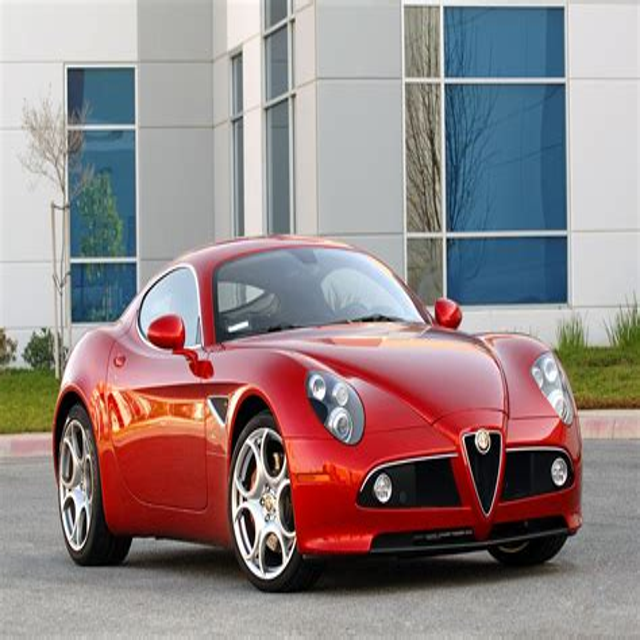

In [33]:
resize_image('img1.jpg', 640,640)